# Competencia: Clasificación de Péptidos Antimicrobianos

El equipo está conformado por:

    Angie Melissa Calderón Albarracin
    Diego Alejandro Zapata Alcaraz
    Juan David Valencia Quiceno
    Juan Esteban Arroyave Duque

### Obtención de los datos

In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
#Importar paquetes
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as ts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.manifold import TSNE
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
#Cargar la data
data_positiva=pd.read_csv('Datos/DatosPositivos1.csv')
data_negativa=pd.read_csv('Datos/DatosNegativos1.csv')
data_validacion=pd.read_csv('Datos/DatosValidacion1.csv')

data_positiva['Tipo']='Train'
data_negativa['Tipo']='Train'
data_validacion['Tipo']='Test'

data_pre=pd.concat([data_positiva,data_negativa,data_validacion])
#Nota: La clase 1, corresponde a los péptidos que SON antimicrobianos, 0 los que no.
# Adicional los datos están desbalanceados en la siguiente relacion 60% son positivos 40% negativos.

print('Forma de los datos positivos',data_positiva.shape)
print('Forma de los datos negativos',data_negativa.shape)
print('Forma de los datos validacion',data_validacion.shape)
print('Forma de los datos del preprocesamiento',data_pre.shape)

Forma de los datos positivos (8322, 1762)
Forma de los datos negativos (5561, 1761)
Forma de los datos validacion (1623, 1763)
Forma de los datos del preprocesamiento (15506, 1763)


## Parte 1

### Preprocesamiento de datos
    1.Identificación de colummnas adicionales o diferentes entre los datos
    2.Eliminicación de columnas con más 1% de null y nan


In [117]:
# Encontrar las columnas que no se encuentra en los datasets (positivo, negativo y validación)
col_val=data_validacion.columns
col_pos=data_positiva.columns
col_neg=data_negativa.columns

for i in col_val:
    if i not in col_neg:
        print(i, 'No se encuentra')

Unnamed: 0 No se encuentra
Unnamed: 0.1 No se encuentra


In [3]:
#Elimianción de columnas con mayor cantidad de null o nan
aux=(data_pre.isnull().sum()/len(data_pre))*100
col_total=data_pre.columns
col_remove=[col_total[i] for i in range(len(col_total)) if aux[i]>=1]

data_pre=data_pre.drop(col_remove,axis=1)
data_pre.shape

(15506, 1761)

### Estandariazación de los datos

In [4]:
#Volviendo a la estructura original
data_train=data_pre[data_pre['Tipo']=='Train']
data_val=data_pre[data_pre['Tipo']=='Test']

data_train=data_train.drop(['Tipo'],axis=1)
data_test=data_val.drop(['Tipo'],axis=1)

y=data_train.pop('class')
X=data_train

y_val=data_val.pop('class')
X_val=data_val

In [5]:
#Realizamos un partición de los datos: 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
#Extraer la columnas con valores numéricos
col_num=[i for i in X_train.columns if "int" in str(X_train[i].dtype) or "float" in str(X_train[i].dtype)]

#Ceación del modelo de normalización y aplicación
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train[col_num])
X_test_std=scaler.transform(X_test[col_num])
X_val_std=scaler.transform(X_val[col_num])

### Implementación de los modelos de clasificación

Los modelos con los cuales trabajaremos son:
    
    1.LogisticRegressor
    2.SVM (Lineal, Radial y Polinomial)
    3.Naive Bayes
    4.Red Neuronal
    5.RandomForest

In [7]:
#Regresión Logistica
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred = lr.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print ("Precisión del clasificador Logística: %.2f " %(acc*100) )

Precisión del clasificador Logística: 87.36 


In [8]:
# SVM
#Una SVM Lineal, SVM de base Radial y SVM Polinomial
#svm_lineal = SVC(kernel='linear', C=1.0, random_state=0)
svm_rbf = SVC(kernel='rbf', C=2.0, random_state=1)
#svm_poly = SVC(kernel='poly', C=1.0, random_state=0)

# Entrenamos los modelos
#svm_lineal.fit(X_train_std, y_train)
svm_rbf.fit(X_train_std, y_train)
#svm_poly.fit(X_train_std, y_train)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [10]:
#y_pred = svm_lineal.predict(X_test_std)
#acc = accuracy_score(y_test, y_pred)
#print ("Precisión del clasificador Lineal: %.2f " %(acc*100.0))

y_pred = svm_rbf.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print ("Precisión del clasificador Radial: %.2f " %(acc*100.0))

#y_pred = svm_poly.predict(X_test_std)
#acc = accuracy_score(y_test, y_pred)
#print ("Precisión del clasificador Polinomial: %.2f " %(acc*100.0))

Precisión del clasificador Radial: 91.18 


In [9]:
#Naive Bayes
nv = naive_bayes.GaussianNB()
nv.fit(X_train_std,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
y_pred = nv.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print ("Precisión del clasificador Naive Bayes: %.2f " %(acc*100.0))

Precisión del clasificador Naive Bayes: 75.77 


In [10]:
#Random Forest
rf = RandomForestClassifier(n_estimators=50,max_depth=None)
rf.fit(X_train[col_num], y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
#Random Forest
y_pred=rf.predict(X_test[col_num])
acc = accuracy_score(y_test, y_pred)
print ("Precisión del clasificador RandomForest: %.2f " %(acc*100.0))

Precisión del clasificador RandomForest: 90.75 


In [11]:
#Red Neuronal
model = Sequential([Dense(units=50, input_dim=1758,activation='tanh'),
                    Dense(units=20, activation='tanh'),
                    Dense(units=1, activation='sigmoid')])

model.compile(optimizer='nadam', 
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(X_train[col_num],y_train, validation_data=(X_test[col_num],y_test), epochs=300, verbose=0)

In [114]:
#model.fit(X_train[col_num1], y_train, epochs=300)
test_loss, test_acc= model.evaluate(X_test[col_num],y_test)
print('Precisión del clasificador NN: %.2f' %(test_acc*100))

2777/2777 [==============================] - 0s 64us/sample - loss: 0.3829 - acc: 0.8444
Precisión del clasificador NN: 84.44


### Validación Cruzada

In [0]:
# Regresión Logística
scores_lr = cross_val_score(lr, X[col_num1], y, cv=4)
print ("Precisión Regresión Logística: %0.4f (+/- %0.2f)" % (scores_lr.mean(), scores_lr.std()*2))
print(scores_lr)

Precisión Regresión Logística: 0.8386 (+/- 0.13)
[0.90665514 0.87237107 0.83981562 0.73573487]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# SVM Radial
scores_svm_rbf = cross_val_score(svm_rbf, X[col_num1], y, cv=4)
print("Precisión SVM Radial: %0.4f (+/- %0.2f)" % (scores_svm_rbf.mean(), scores_svm_rbf.std()*2))
print(scores_svm_rbf)

Precisión SVM Radial: 0.7388 (+/- 0.13)
[0.7758571  0.82829156 0.66349755 0.68760807]


In [0]:
# Naive Bayes
scores_nv = cross_val_score(nv, X[col_num1], y, cv=4)
print("Precisión Naive Bayes: %0.4f (+/- %0.2f)" % (scores_nv.mean(), scores_nv.std()*2))
print(scores_nv)

Precisión Naive Bayes: 0.6592 (+/- 0.22)
[0.70498415 0.74099683 0.47248632 0.7184438 ]


In [0]:
# Random Forest
scores_rf = cross_val_score(rf, X[col_num1], y, cv=4)
print("Precisión Bosque Aleatorios: %0.4f (+/- %0.2f)" % (scores_rf.mean(), scores_rf.std()*2))
print(scores_rf)

Precisión Bosque Aleatorios: 0.7738 (+/- 0.18)
[0.70123884 0.91385768 0.78594065 0.69423631]


In [0]:
def create_model():

   model = Sequential([Dense(units=50, input_dim=1758,activation='tanh'),
                    Dense(units=20, activation='tanh'),
                    Dense(units=1, activation='sigmoid')])
   
   model.compile(optimizer='nadam', 
              loss='binary_crossentropy',
              metrics=['acc',f1_m,precision_m, recall_m])
   return model

n_split=3
scores_nn=[]
for train_index,test_index in KFold(n_split).split(X[col_num1]):
  x_train,x_test=X.iloc[list(train_index)],X.iloc[list(test_index)]
  y_train,y_test=y.iloc[list(train_index)],y.iloc[list(test_index)]

  model=create_model()
  model.fit(x_train[col_num1], y_train,epochs=100)
  test_loss, test_acc = model.evaluate(x_test[col_num2],y_test)
  print('Precisión del clasificador NN:', test_acc*100)
  scores_nn.append(test_acc)

print("Precisión Bosque Aleatorios: %0.4f (+/- %0.2f)" % (scores_rf.mean(), scores_rf.std()*2))
print(scores_rf)


Train on 9255 samples
Epoch 1/100
9255/9255 [==============================] - 2s 202us/sample - loss: 0.6408 - acc: 0.6406
Epoch 2/100
9255/9255 [==============================] - 2s 182us/sample - loss: 0.5593 - acc: 0.7259
Epoch 3/100
9255/9255 [==============================] - 2s 182us/sample - loss: 0.4777 - acc: 0.8024
Epoch 4/100
9255/9255 [==============================] - 2s 184us/sample - loss: 0.4395 - acc: 0.8224
Epoch 5/100
9255/9255 [==============================] - 2s 184us/sample - loss: 0.4099 - acc: 0.8464
Epoch 6/100
9255/9255 [==============================] - 2s 179us/sample - loss: 0.4247 - acc: 0.8434
Epoch 7/100
9255/9255 [==============================] - 2s 181us/sample - loss: 0.4344 - acc: 0.8350
Epoch 8/100
9255/9255 [==============================] - 2s 180us/sample - loss: 0.4070 - acc: 0.8549
Epoch 9/100
9255/9255 [==============================] - 2s 180us/sample - loss: 0.4086 - acc: 0.8546
Epoch 10/100
9255/9255 [==============================] - 2s

### Datos de validación

In [97]:
y_pred_lr = lr.predict(X_val_std)
acc_lr = accuracy_score(y_val, y_pred_lr)
print ("Accuracy del clasificador Regresión Log: %.2f " %(acc_lr*100))
pre_lr=precision_score(y_val, y_pred_lr, average='binary')
print ("Precisión Regresión Log: %.2f " %(pre_lr*100.0))
rcall_lr=recall_score(y_val, y_pred_lr, average='binary')
print ("Recall Regresión Log: %.2f " %(rcall_lr*100.0))
f1_lr=f1_score(y_val, y_pred_lr, average='binary')
print ("F1 Score Regresión Log: %.2f " %(f1_lr*100.0))
mat_lr = confusion_matrix(y_val, y_pred_lr)
print ("Matriz de Confusión Regresión Log: \n", mat_lr)

y_pred_svm_rbf = svm_rbf.predict(X_val_std)
acc_svm_rbf = accuracy_score(y_val,y_pred_svm_rbf)
print ("\nAccuracy del clasificador SVM Radial: %.2f " %(acc_svm_rbf*100.0))
pre_svm_rbf=precision_score(y_val, y_pred_svm_rbf, average='binary')
print ("Precisión SVM Radial: %.2f " %(pre_svm_rbf*100.0))
rcall_svm_rbf=recall_score(y_val, y_pred_svm_rbf, average='binary')
print ("Recall SVM Radial: %.2f " %(rcall_svm_rbf*100.0))
f1_svm_rbf=f1_score(y_val, y_pred_svm_rbf, average='binary')
print ("F1 Score SVM Radial: %.2f " %(f1_svm_rbf*100.0))
mat_svm_rbf = confusion_matrix(y_val, y_pred_svm_rbf)
print ("Matriz de SVM Radial: \n", mat_svm_rbf)

y_pred_nv = nv.predict(X_val_std)
acc_nv = accuracy_score(y_val, y_pred_nv)
print ("\nAccuracy del clasificador Naive Bayes: %.2f " %(acc_nv*100.0))
pre_nv=precision_score(y_val, y_pred_nv, average='binary')
print ("Precisión Naive Bayes: %.2f " %(pre_nv*100.0))
rcall_nv=recall_score(y_val, y_pred_nv, average='binary')
print ("Recall Naive Bayes: %.2f " %(rcall_nv*100.0))
f1_nv=f1_score(y_val, y_pred_nv, average='binary')
print ("F1 Score Naive Bayes: %.2f " %(f1_nv*100.0))
mat_nv = confusion_matrix(y_val, y_pred_nv)
print ("Matriz de Confusión Naive Bayes: \n", mat_nv)

y_pred_rf = rf.predict(X_val[col_num])
acc_rf = accuracy_score(y_val, y_pred_rf)
print ("\nAccuracy del clasificador Random Forest: %.2f " %(acc_rf*100.0))
pre_rf=precision_score(y_val, y_pred_rf, average='binary')
print ("Precisión Random Forest: %.2f " %(pre_rf*100.0))
rcall_rf=recall_score(y_val, y_pred_rf, average='binary')
print ("Recall Random Forest: %.2f " %(rcall_rf*100.0))
f1_rf=f1_score(y_val, y_pred_rf, average='binary')
print ("F1 Score Random Forest: %.2f " %(f1_rf*100.0))
mat_rf = confusion_matrix(y_val, y_pred_rf)
print ("Matriz de Confusión Random Forest: \n", mat_rf)

#Duda técnica sobre el redondeo de la predicción, ya que da valores decimales y no 1-0
y_pred_nn = model.predict(X_val[col_num])
y_pred_nn= np.round(y_pred_nn,0)
acc_nn = accuracy_score(y_val, y_pred_nn)
print ("\nAccuracy del clasificador Red Neuronal: %.2f " %(acc_nn*100.0))
pre_nn=precision_score(y_val, y_pred_nn, average='binary')
print ("Precisión Red Neuronal %.2f " %(pre_nn*100.0))
rcall_nn=recall_score(y_val, y_pred_nn, average='binary')
print ("Recall Red Neuronal %.2f " %(rcall_nn*100.0))
f1_nn=f1_score(y_val, y_pred_nn, average='binary')
print ("F1 Score Red Neuronal: %.2f " %(f1_nn*100.0))
mat_nn = confusion_matrix(y_val, y_pred_nn)
print ("Matriz de Confusión Red Neuronal: \n", mat_nn)

Accuracy del clasificador Regresión Log: 58.41 
Precisión Regresión Log: 28.22 
Recall Regresión Log: 97.77 
F1 Score Regresión Log: 43.80 
Matriz de Confusión Regresión Log: 
 [[685 669]
 [  6 263]]

Accuracy del clasificador SVM Radial: 63.96 
Precisión SVM Radial: 31.46 
Recall SVM Radial: 99.63 
F1 Score SVM Radial: 47.81 
Matriz de SVM Radial: 
 [[770 584]
 [  1 268]]

Accuracy del clasificador Naive Bayes: 78.87 
Precisión Naive Bayes: 41.74 
Recall Naive Bayes: 69.52 
F1 Score Naive Bayes: 52.16 
Matriz de Confusión Naive Bayes: 
 [[1093  261]
 [  82  187]]

Accuracy del clasificador Random Forest: 38.08 
Precisión Random Forest: 21.11 
Recall Random Forest: 100.00 
F1 Score Random Forest: 34.87 
Matriz de Confusión Random Forest: 
 [[ 349 1005]
 [   0  269]]

Accuracy del clasificador Red Neuronal: 74.18 
Precisión Red Neuronal 38.64 
Recall Red Neuronal 94.80 
F1 Score Red Neuronal: 54.90 
Matriz de Confusión Red Neuronal: 
 [[949 405]
 [ 14 255]]


## Parte 2

### Reducción de la dimensionalidad
    1.Exploración de la dimensión
    2.Filtrado de baja varianza
    3.Correlación entre las variables numéricas

In [17]:
t_sne = TSNE(learning_rate=50)
tsne_features = t_sne.fit_transform(X[col_num1])
print(tsne_features.shape)

(13883, 2)


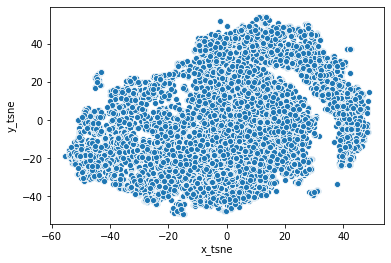

In [18]:
aux=pd.DataFrame([])
aux['x_tsne'] = tsne_features[:,0]
aux['y_tsne'] = tsne_features[:,1]

sns.scatterplot(x="x_tsne", y="y_tsne", data=aux)
plt.show()

In [0]:
# Correlación
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
sns.heatmap(X[col_num1].corr(), center=0,cmap=cmap, linewidths=1,annot=True, fmt=".2f")

### Selección de características

In [63]:
# Logistic Regressor
#Creamos la Elimiinación Recursiva de Características, utilizando como estimador LR y eliminando 5 parámetros por paso
rfe_lr = RFE(estimator=lr,n_features_to_select=1000,step=10, verbose=1)
rfe_lr.fit(X_train_std, y_train)

Fitting estimator with 1758 features.
Fitting estimator with 1748 features.
Fitting estimator with 1738 features.
Fitting estimator with 1728 features.
Fitting estimator with 1718 features.
Fitting estimator with 1708 features.
Fitting estimator with 1698 features.
Fitting estimator with 1688 features.
Fitting estimator with 1678 features.
Fitting estimator with 1668 features.
Fitting estimator with 1658 features.
Fitting estimator with 1648 features.
Fitting estimator with 1638 features.
Fitting estimator with 1628 features.
Fitting estimator with 1618 features.
Fitting estimator with 1608 features.
Fitting estimator with 1598 features.
Fitting estimator with 1588 features.
Fitting estimator with 1578 features.
Fitting estimator with 1568 features.
Fitting estimator with 1558 features.
Fitting estimator with 1548 features.
Fitting estimator with 1538 features.
Fitting estimator with 1528 features.
Fitting estimator with 1518 features.
Fitting estimator with 1508 features.
Fitting esti

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='liblinear',
                                 tol=0.0001, verbose=0, warm_start=False),
    n_features_to_select=1000, step=10, verbose=1)

In [64]:
# Creamos la máscara de parámetros
lr_mask=rfe_lr.support_

# Se calcula la precisión del modelo, utilizando únicamente las características seleccionadas
acc = accuracy_score(y_test, rfe_lr.predict(X_test_std))
print("Precisión del clasificador Logistic Regressor con reducción de dimensión: %.2f " %(acc*100))

Precisión del clasificador Logistic Regressor con reducción de dimensión: 88.26 


In [17]:
# Random Forest
#Creamos la Elimiinación Recursiva de Características, utilizando como estimador RF y eliminando 5 parámetros por paso
rfe_rf = RFE(estimator=rf,n_features_to_select=700,step=10, verbose=1)
rfe_rf.fit(X_train_std, y_train)

# Creamos la máscara de parámetros
rf_mask=rfe_rf.support_

Fitting estimator with 1000 features.
Fitting estimator with 990 features.
Fitting estimator with 980 features.
Fitting estimator with 970 features.
Fitting estimator with 960 features.
Fitting estimator with 950 features.
Fitting estimator with 940 features.
Fitting estimator with 930 features.
Fitting estimator with 920 features.
Fitting estimator with 910 features.
Fitting estimator with 900 features.
Fitting estimator with 890 features.
Fitting estimator with 880 features.
Fitting estimator with 870 features.
Fitting estimator with 860 features.
Fitting estimator with 850 features.
Fitting estimator with 840 features.
Fitting estimator with 830 features.
Fitting estimator with 820 features.
Fitting estimator with 810 features.
Fitting estimator with 800 features.
Fitting estimator with 790 features.
Fitting estimator with 780 features.
Fitting estimator with 770 features.
Fitting estimator with 760 features.
Fitting estimator with 750 features.
Fitting estimator with 740 features.


In [23]:
#Aplicación de la máscara a las columnas
X_reduced=X[col_num].iloc[:,rf_mask]
X_reduced.shape

(13883, 700)

### Extracción de características

In [149]:
#Se realiza el análisis de los componente principales, con 4
# después de ver que el 93% de la variabilidad la explican las 2 primeras componentes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X[col_num].values)

In [148]:
# Función acumulada de la variación explicada por las primeras 4 componentes.
np.cumsum(pca.explained_variance_ratio_)

array([0.91889238, 0.93046783, 0.93995474, 0.94615616])

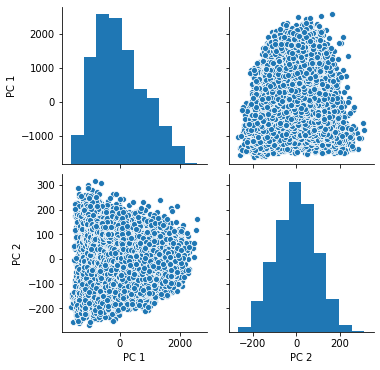

In [151]:
# Del gráfico podemos inferir que no se encuentra relación alguna entre las componentes seleccionadas
pca_df = pd.DataFrame(pca_result, columns=['PC 1', 'PC 2'])
sns.pairplot(pca_df)
plt.show()

In [157]:
#Utilización de Pipeline, para aplicar varios procesos simultanios y obtener resutados inmediatos 
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train[col_num], y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test[col_num], y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.1202741 0.0304348]
61.3% test set accuracy


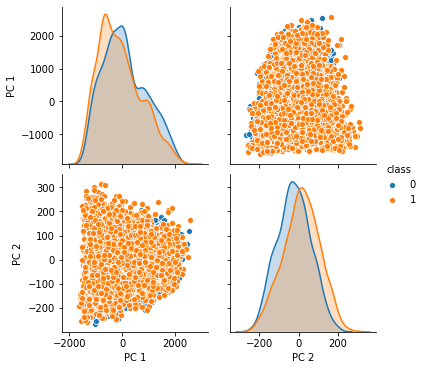

In [174]:
#Influencia de las compentes para la difereciación de la clases
y_df=pd.DataFrame(y)
y_df.reset_index(drop=True, inplace=True)
pca_df.reset_index(drop=True, inplace=True)

pca_df2= pd.concat([pca_df,y_df],axis = 1)
pca_df2.columns=['PC 1', 'PC 2','class']
sns.pairplot(pca_df2,hue='class')

### Implementación de modelos con datos reducidos de dimensión

In [24]:
#Nota: Se puede concluir que las características eliminadas no afectan el desempeño porque se obtuvieron valores similares
#     después de una reducción del 43% de las características se mantuvo la precisión.
#Validación de la reducción
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=0)
col_num=[i for i in X_train.columns if "int" in str(X_train[i].dtype) or "float" in str(X_train[i].dtype)]
X_train_std=scaler.fit_transform(X_train[col_num])
X_test_std=scaler.transform(X_test[col_num])

#Regresión Logistica
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_std,y_train)
y_pred = lr.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print ("Precisión del clasificador Logistica: %.2f " %(acc*100) )

#SVM Radial
svm_rbf = SVC(kernel='rbf', C=2.0, random_state=1)
svm_rbf.fit(X_train_std, y_train)
y_pred = svm_rbf.predict(X_test_std)
acc2 = accuracy_score(y_test, y_pred)
print ("Precisión del clasificador Radial: %.2f " %(acc2*100.0))

#Naive Bayes
nv = naive_bayes.GaussianNB()
nv.fit(X_train_std,y_train)
y_pred = nv.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print ("Precisión del clasificador Naive Bayes: %.2f " %(acc*100.0))

#Random Forest
rf = RandomForestClassifier(n_estimators=50,max_depth=None)
rf.fit(X_train[col_num], y_train)
y_pred=rf.predict(X_test[col_num])
acc = accuracy_score(y_test, y_pred)
print ("Precisión del clasificador RandomForest: %.2f " %(acc*100.0))

#Red Neuronal
model = Sequential([Dense(units=50, input_dim=700,activation='tanh'),
                    Dense(units=20, activation='tanh'),
                    Dense(units=1, activation='sigmoid')])

model.compile(optimizer='nadam', 
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=500, verbose=0)
test_loss, test_acc= model.evaluate(X_test[col_num],y_test)
print('Precisión del clasificador NN: %.2f' %(test_acc*100))

Precisión del clasificador Logistica: 88.19 
Precisión del clasificador Radial: 91.18 
Precisión del clasificador Naive Bayes: 68.35 
Precisión del clasificador RandomForest: 91.00 
2777/2777 [==============================] - 0s 60us/sample - loss: 0.2529 - acc: 0.8790
Precisión del clasificador NN: 87.90


### Hyperparameter Tuning

Debido a que el mejor modelo de selección durante todo el proceso ha sido Random Forest, se procede con este

In [31]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 9)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 10, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 21, 32, 43, 55, 66, 77, 88, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [30]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 54.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 232.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 428.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [32]:
#Identifiación de los mejores parámetros
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [33]:
#Creamos nuevamente el modelo con los nuevos parámetros encontrados
rf = RandomForestClassifier(n_estimators=1400,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=40)
rf.fit(X_train[col_num], y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Datos validación

In [34]:
X_val_red=X_val[col_num]
X_val_std=scaler.fit_transform(X_val[col_num])

y_pred_lr = lr.predict(X_val_std)
acc_lr = accuracy_score(y_val, y_pred_lr)
print ("Accuracy del clasificador Regresión Log: %.2f " %(acc_lr*100))
pre_lr=precision_score(y_val, y_pred_lr, average='binary')
print ("Precisión Regresión Log: %.2f " %(pre_lr*100.0))
rcall_lr=recall_score(y_val, y_pred_lr, average='binary')
print ("Recall Regresión Log: %.2f " %(rcall_lr*100.0))
f1_lr=f1_score(y_val, y_pred_lr, average='binary')
print ("F1 Score Regresión Log: %.2f " %(f1_lr*100.0))
mat_lr = confusion_matrix(y_val, y_pred_lr)
print ("Matriz de Confusión Regresión Log: \n", mat_lr)

y_pred_svm_rbf = svm_rbf.predict(X_val_std)
acc_svm_rbf = accuracy_score(y_val,y_pred_svm_rbf)
print ("\nAccuracy del clasificador SVM Radial: %.2f " %(acc_svm_rbf*100.0))
pre_svm_rbf=precision_score(y_val, y_pred_svm_rbf, average='binary')
print ("Precisión SVM Radial: %.2f " %(pre_svm_rbf*100.0))
rcall_svm_rbf=recall_score(y_val, y_pred_svm_rbf, average='binary')
print ("Recall SVM Radial: %.2f " %(rcall_svm_rbf*100.0))
f1_svm_rbf=f1_score(y_val, y_pred_svm_rbf, average='binary')
print ("F1 Score SVM Radial: %.2f " %(f1_svm_rbf*100.0))
mat_svm_rbf = confusion_matrix(y_val, y_pred_svm_rbf)
print ("Matriz de SVM Radial: \n", mat_svm_rbf)

y_pred_nv = nv.predict(X_val_std)
acc_nv = accuracy_score(y_val, y_pred_nv)
print ("\nAccuracy del clasificador Naive Bayes: %.2f " %(acc_nv*100.0))
pre_nv=precision_score(y_val, y_pred_nv, average='binary')
print ("Precisión Naive Bayes: %.2f " %(pre_nv*100.0))
rcall_nv=recall_score(y_val, y_pred_nv, average='binary')
print ("Recall Naive Bayes: %.2f " %(rcall_nv*100.0))
f1_nv=f1_score(y_val, y_pred_nv, average='binary')
print ("F1 Score Naive Bayes: %.2f " %(f1_nv*100.0))
mat_nv = confusion_matrix(y_val, y_pred_nv)
print ("Matriz de Confusión Naive Bayes: \n", mat_nv)

y_pred_rf = rf.predict(X_val[col_num])
acc_rf = accuracy_score(y_val, y_pred_rf)
print ("\nAccuracy del clasificador Random Forest: %.2f " %(acc_rf*100.0))
pre_rf=precision_score(y_val, y_pred_rf, average='binary')
print ("Precisión Random Forest: %.2f " %(pre_rf*100.0))
rcall_rf=recall_score(y_val, y_pred_rf, average='binary')
print ("Recall Random Forest: %.2f " %(rcall_rf*100.0))
f1_rf=f1_score(y_val, y_pred_rf, average='binary')
print ("F1 Score Random Forest: %.2f " %(f1_rf*100.0))
mat_rf = confusion_matrix(y_val, y_pred_rf)
print ("Matriz de Confusión Random Forest: \n", mat_rf)

#Duda técnica sobre el redondeo de la predicción, ya que da valores decimales y no 1-0
y_pred_nn = model.predict(X_val[col_num])
y_pred_nn= np.round(y_pred_nn,0)
acc_nn = accuracy_score(y_val, y_pred_nn)
print ("\nAccuracy del clasificador Red Neuronal: %.2f " %(acc_nn*100.0))
pre_nn=precision_score(y_val, y_pred_nn, average='binary')
print ("Precisión Red Neuronal %.2f " %(pre_nn*100.0))
rcall_nn=recall_score(y_val, y_pred_nn, average='binary')
print ("Recall Red Neuronal %.2f " %(rcall_nn*100.0))
f1_nn=f1_score(y_val, y_pred_nn, average='binary')
print ("F1 Score Red Neuronal: %.2f " %(f1_nn*100.0))
mat_nn = confusion_matrix(y_val, y_pred_nn)
print ("Matriz de Confusión Red Neuronal: \n", mat_nn)

Accuracy del clasificador Regresión Log: 49.41 
Precisión Regresión Log: 24.21 
Recall Regresión Log: 96.28 
F1 Score Regresión Log: 38.69 
Matriz de Confusión Regresión Log: 
 [[543 811]
 [ 10 259]]

Accuracy del clasificador SVM Radial: 51.69 
Precisión SVM Radial: 25.41 
Recall SVM Radial: 98.88 
F1 Score SVM Radial: 40.43 
Matriz de SVM Radial: 
 [[573 781]
 [  3 266]]

Accuracy del clasificador Naive Bayes: 67.04 
Precisión Naive Bayes: 31.63 
Recall Naive Bayes: 85.13 
F1 Score Naive Bayes: 46.12 
Matriz de Confusión Naive Bayes: 
 [[859 495]
 [ 40 229]]

Accuracy del clasificador Random Forest: 31.36 
Precisión Random Forest: 19.45 
Recall Random Forest: 100.00 
F1 Score Random Forest: 32.57 
Matriz de Confusión Random Forest: 
 [[ 240 1114]
 [   0  269]]

Accuracy del clasificador Red Neuronal: 20.46 
Precisión Red Neuronal 17.24 
Recall Red Neuronal 100.00 
F1 Score Red Neuronal: 29.41 
Matriz de Confusión Red Neuronal: 
 [[  63 1291]
 [   0  269]]


## Conclusión

Después de aplicar la selección de caractaerísticas y de buscar los mejores parámetros para el clasificador Random Forest, se notó la decadencia de las métricas. Es importante resaltar que el clasificador Red Neuronal, perdió significativamente la exactitud de la predicción.
